Figure 5: GMOC - CNTRL, Anom and Time-series

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw


Populating the interactive namespace from numpy and matplotlib


In [2]:
#NYFCntrlDir = '/g/data/jk72/pas561/mom/archive/kds75_cp_contd/'#/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr'#/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'
#of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
#cntrl_gmoc2=np.load(of)
#print(cntrl_gmoc2.shape)

Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
##print Ocean_File
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=True)
print(cntrl.ty_trans_rho.shape)

##pert_gmoc=np.zeros((pert.ty_trans_rho.shape[0],pert.ty_trans_rho.shape[1],pert.ty_trans_rho.shape[2]))
print(cntrl.ty_trans_rho.shape)
cntrl_gmoc=np.zeros((cntrl.ty_trans_rho.shape[0],cntrl.ty_trans_rho.shape[1],cntrl.ty_trans_rho.shape[2]))
print(cntrl_gmoc.shape)
#cntrl_gmoc[0:77,:,:]=cntrl_gmoc2

for t in range(0,cntrl.ty_trans_rho.shape[0]):
    print(t)
    cntrl_gmoc[t,:,:]=cntrl.ty_trans_rho[t,:,:,:].sum('grid_xt_ocean').cumsum('potrho').compute()

print(cntrl_gmoc.shape)

of=os.path.join(NYFPertDir,'gmoc_adv_rho_ann_114to154.npy')
a=np.save(of,cntrl_gmoc)

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/xarray/coding/times.py:122: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


(41, 80, 2700, 3600)
(41, 80, 2700, 3600)
(41, 80, 2700)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
(41, 80, 2700)


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/mom025_ocean_grid.nc'
vgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
#print geolon_t.shape

fh=fcor/ht
#print fh.shape

vgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

mom025_yu_ocean=yu_ocean
mom025_potrho=potrho

In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

0.11.0


In [4]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
cntrl_gmoc=np.load(of)
#print cntrl_gmoc.shape

of=os.path.join(NYFCntrlDir,'gmoc_gm_rho.npy')
cntrl_gmoc_gm=np.load(of)
#print cntrl_gmoc_gm.shape

#load gmoc in rho space
of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
pert_gmoc=np.load(of)
#print pert_gmoc.shape

of=os.path.join(NYFPertDir,'gmoc_gm_rho.npy')
pert_gmoc_gm=np.load(of)
#print pert_gmoc_gm.shape

1036.8125
[-11.21303419 -11.21303419 -11.27553463 -11.45677904 -11.27761644
 -11.28591161 -11.35203765 -11.42081562 -11.32812674 -11.35970728
 -11.59907604 -11.77609005 -11.77860212 -11.70583916 -11.73641513
 -11.54321915 -11.62704483 -11.9526176  -11.94830557 -11.9534682
 -12.14191687 -12.38355244 -12.11656701 -12.27224271 -12.46854406
 -12.77972362 -12.93894092 -12.90836238 -12.89022763 -12.79249164
 -12.77528139 -12.67082218 -12.54609664 -12.49054231 -12.3877669
 -12.33884651 -12.24677511 -12.25904896 -12.30550902 -12.45848356
 -12.47457432 -12.46032463 -12.48024355 -12.50479371 -12.47373999
 -12.45634884 -12.78310713 -12.84921731 -12.83295221]
[-11.275307  -11.233589  -13.607563  -23.264591  -38.601006  -41.877724
 -42.40066   -43.50554   -43.348114  -42.69758   -36.2844    -27.94646
 -25.60434   -20.976452  -14.881052  -14.193445  -13.579834  -13.029101
 -12.782346  -12.731424  -12.735585  -12.777071  -12.86257   -13.033297
 -13.170392  -13.30088   -13.247812  -13.187504  -13.0655

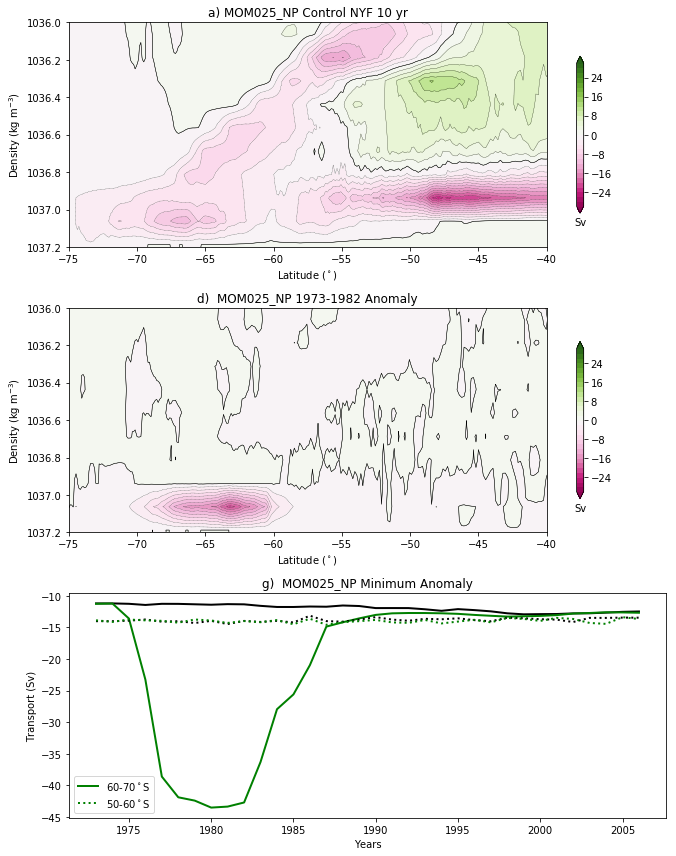

In [5]:
#plot GM Net in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('')


yrs=np.arange(1973,2016,1)

t1=0
t2=9
clev = np.arange(-30,32,2)

plt.subplot(311)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(cntrl_gmoc_gm[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(cntrl_gmoc_gm[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(cntrl_gmoc_gm[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='a) MOM025_NP Control NYF 10 yr'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')


#clev = np.arange(-30,32,2)
#var=np.mean(pert_gmoc[t1:t2+1,:,:],axis=0)+np.mean(pert_gmoc_gm[t1:t2+1,:,:],axis=0)

#plt.subplot(312)
#plt.contourf(yu_ocean,potrho,var,cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Sv')
#plt.contour(yu_ocean,potrho,var,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,var,levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.2,1036))
#plt.ylabel('Density (kg m$^{-3}$)')
#plt.xlabel('Latitude ($^\circ$)')
#plt.xlim([-75,-20])
#tit='b)  MOM025_NP 1973-1982'
#plt.title(tit)
##plt.plot([-75,-20], [1036.86,1036.86], 'k')

var=np.mean(pert_gmoc[t1:t2+1,:,:],axis=0)+np.mean(pert_gmoc_gm[t1:t2+1,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc_gm[t1:t2,:,:],axis=0)

plt.subplot(312)
plt.contourf(yu_ocean,potrho,var,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,var,levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,var,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='d)  MOM025_NP 1973-1982 Anomaly'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')


#ax3 = plt.axes([0.99,0.38,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('Sv')

#plot time series of transports (with GM ... only 9 yrs for CNTRL) so using cntrl mean
T=np.arange(50)
#print T.shape

#add 10 year mean GM to adv cntrl 
cntrl_gmoc_net=cntrl_gmoc[:,:,:]+np.mean(cntrl_gmoc_gm[:,:,:],axis=0)
#print cntrl_gmoc_net.shape

z1=np.argwhere(potrho<=1036.8125)
#print potrho[z1]
z1=np.asscalar(z1[-1])
print(potrho[z1])

ts=pert_gmoc.shape
ts=ts[0]
#print ts

# do lower cell average between lats 60-70S
j1=np.argwhere(yt_ocean<-69.9)
j2=np.argwhere(yt_ocean<-60)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
#print(j1,j2,yt_ocean[j1],yt_ocean[j2])
#print(yt_ocean[j1:j2])


lc_cntrl60_psj = cntrl_gmoc_net[:,z1:,j1:j2]
lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)
print(lc_cntrl60_psj_ts)


lc_pert60_psj = pert_gmoc[:,z1:,j1:j2]+pert_gmoc_gm[:,z1:,j1:j2]
lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)
print(lc_pert60_psj_ts)

# do lower cell average between lats 60-70S
j1=np.argwhere(yt_ocean<-59.9)
j2=np.argwhere(yt_ocean<-50)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
#print yt_ocean[j1:j2]

lc_cntrl50_psj = cntrl_gmoc_net[:,z1:,j1:j2]
lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)
print(lc_pert60_psj_ts)

lc_pert50_psj = pert_gmoc[:,z1:,j1:j2]+pert_gmoc_gm[:,z1:,j1:j2]
lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)
print(lc_pert50_psj_ts)

print(yrs[0:34])
print(lc_cntrl60_psj_ts.shape)

plt.subplot(313)
plt.plot(yrs[0:34],lc_cntrl60_psj_ts[0:34],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:34],lc_pert60_psj_ts[0:34],linestyle='-',color='g',label='60-70$^\circ$S',linewidth=2)
tit='Rho > ' +str(potrho[z1]) + ' 50-60$^\circ$S'
plt.plot(yrs[0:34],lc_cntrl50_psj_ts[0:34],linestyle=':',color='k',linewidth=2)
plt.plot(yrs[0:34],lc_pert50_psj_ts[0:34],linestyle=':',color='g',label='50-60$^\circ$S',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='g)  MOM025_NP Minimum Anomaly'
plt.title(tit)
plt.legend(fontsize=10)

plt.tight_layout()

#of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig6a_gmoc.png'
#plt.savefig(of,dpi=220)

In [6]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
cntrl_gmoc=np.load(of)
print(cntrl_gmoc.shape)

#load gmoc in rho space
of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
pert_gmoc=np.load(of)
print(pert_gmoc.shape)

(50, 80, 1080)
(44, 80, 1080)


(50,)
[1036.8125]


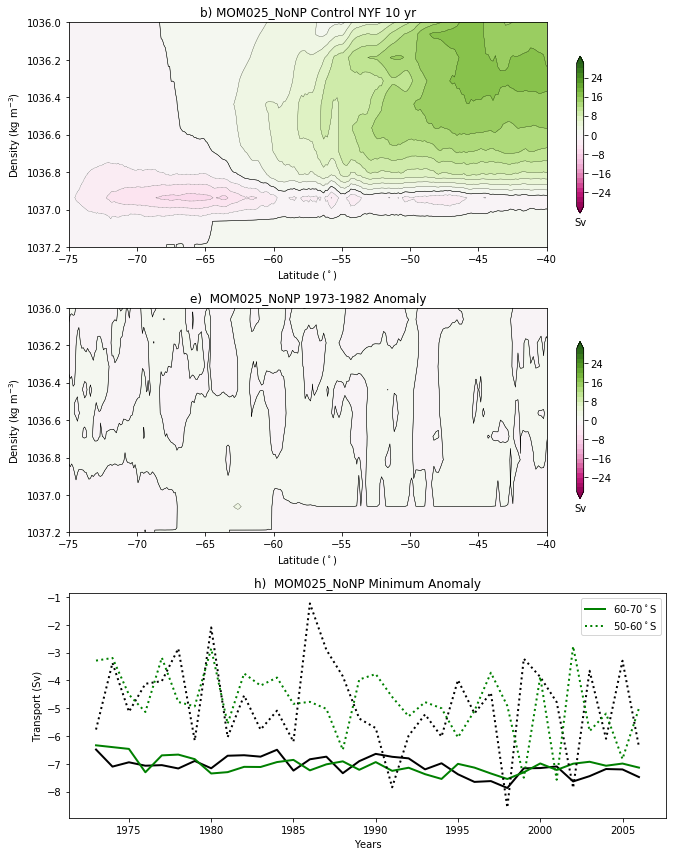

In [7]:
#plot GM Net in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('')


yrs=np.arange(1973,2016,1)

t1=0
t2=9
clev = np.arange(-30,32,2)

plt.subplot(311)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='b) MOM025_NoNP Control NYF 10 yr'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')


#clev = np.arange(-30,32,2)
#var=np.mean(pert_gmoc[t1:t2+1,:,:],axis=0)+np.mean(pert_gmoc_gm[t1:t2+1,:,:],axis=0)

#plt.subplot(312)
#plt.contourf(yu_ocean,potrho,var,cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Sv')
#plt.contour(yu_ocean,potrho,var,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,var,levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.2,1036))
#plt.ylabel('Density (kg m$^{-3}$)')
#plt.xlabel('Latitude ($^\circ$)')
#plt.xlim([-75,-20])
#tit='b)  MOM025_NP 1973-1982'
#plt.title(tit)
##plt.plot([-75,-20], [1036.86,1036.86], 'k')

var=np.mean(pert_gmoc[t1:t2+1,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)

plt.subplot(312)
plt.contourf(yu_ocean,potrho,var,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,var,levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,var,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='e)  MOM025_NoNP 1973-1982 Anomaly'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')


#ax3 = plt.axes([0.99,0.38,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('Sv')

#plot time series of transports (with GM ... only 9 yrs for CNTRL) so using cntrl mean
T=np.arange(50)
print(T.shape)

z1=np.argwhere(potrho<=1036.8125)
#print potrho[z1]
z1=z1[-1]
print(potrho[z1])

ts=pert_gmoc.shape
ts=ts[0]
#print ts

# do lower cell average between lats 60-70S
j1=np.argwhere(yt_ocean<-69.9)
j2=np.argwhere(yt_ocean<-60)
j1=j1[-1]
j2=j2[-1]
#print yt_ocean[j1:j2]

lc_cntrl60_psj = cntrl_gmoc[:,z1.item():,j1.item():j2.item()]
lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)

lc_pert60_psj = pert_gmoc[:,z1.item():,j1.item():j2.item()]
lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)

# do lower cell average between lats 60-70S
j1=np.argwhere(yt_ocean<-59.9)
j2=np.argwhere(yt_ocean<-50)
j1=j1[-1]
j2=j2[-1]
#print yt_ocean[j1:j2]

lc_cntrl50_psj = cntrl_gmoc[:,z1.item():,j1.item():j2.item()]
lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)

lc_pert50_psj = pert_gmoc[:,z1.item():,j1.item():j2.item()]
lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)


plt.subplot(313)
tit='Rho > ' +str(potrho[z1]) + ' 60-70$^\circ$S'
plt.plot(yrs[0:34],lc_cntrl60_psj_ts[0:34],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:34],lc_pert60_psj_ts[0:34],linestyle='-',color='g',label='60-70$^\circ$S',linewidth=2)
tit='Rho > ' +str(potrho[z1]) + ' 50-60$^\circ$S'
plt.plot(yrs[0:34],lc_cntrl50_psj_ts[0:34],linestyle=':',color='k',linewidth=2)
plt.plot(yrs[0:34],lc_pert50_psj_ts[0:34],linestyle=':',color='g',label='50-60$^\circ$S',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='h)  MOM025_NoNP Minimum Anomaly'
plt.title(tit)
plt.legend(fontsize=10)

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig6b_gmoc.png'
plt.savefig(of,dpi=220)

In [8]:
#load gmoc in rho space
NYFCntrlDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'

#Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
#print Ocean_File
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print pert.ty_trans_rho.shape

vgrid_file='/g/data3/hh5/tmp/pas561/kds75_cp/output430/ocean.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yu_ocean = nc.variables['yu_ocean'][:]
#potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho.shape
#print yu_ocean.shape

##of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
#pert_gmoc=np.load(of)
#print pert_gmoc.shape

##of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
#of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
#cntrl_gmoc=np.load(of)
#print cntrl_gmoc.shape

In [6]:
NYFPertDir = '/g/data/jk72/pas561/mom/archive/kds75_wp2_contd/'#/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
#of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
#cntrl_gmoc2=np.load(of)
#print(cntrl_gmoc2.shape)

Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
##print Ocean_File
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=True)
print(pert.ty_trans_rho.shape)

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/xarray/coding/times.py:122: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


(70, 80, 2700, 3600)


In [7]:
print(pert.ty_trans_rho.shape)
pert_gmoc=np.zeros((pert.ty_trans_rho.shape[0],pert.ty_trans_rho.shape[1],pert.ty_trans_rho.shape[2]))
print(pert_gmoc.shape)
#cntrl_gmoc[0:77,:,:]=cntrl_gmoc2

for t in range(0,pert.ty_trans_rho.shape[0]):
    print(t)
    pert_gmoc[t,:,:]=pert.ty_trans_rho[t,:,:,:].sum('grid_xt_ocean').cumsum('potrho').compute()

print(pert_gmoc.shape)

of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
a=np.save(of,pert_gmoc)

(70, 80, 2700, 3600)
(70, 80, 2700)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
(70, 80, 2700)


In [11]:
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr'#/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'
of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
pert_gmoc=np.load(of)
print(pert_gmoc.shape)

NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp/'#/g/data/hh5/tmp/cosima/mom01v5/kds75_cp/'
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
cntrl_gmoc=np.load(of)
print(cntrl_gmoc.shape)

(116, 80, 2700)
(67, 80, 2700)


In [12]:
#store annual mean gmoc (instead of seasonal)
pert_gmoc_ann=np.zeros((28,80,2700))
cntrl_gmoc_ann=np.zeros((28,80,2700))

yrs=np.arange(1973,2016,1)

ii=0
seasons=np.arange(443,557)

for yr in range(0,28):
    if yr<1:
        #first year is only 9 months ... use first 3 months of next year
        t1=0
        t2=4
    elif yr<2:
        t1=3
        t2=7
    else:
        t1=t2
        t2=t2+4
        
    print(t1, t2, seasons[t1:t2])
        
    pert_gmoc_ann[yr,:,:]=np.mean(pert_gmoc[t1:t2,:,:],axis=0)
    cntrl_gmoc_ann[yr,:,:]=np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)

(0, 4, array([443, 444, 445, 446]))
(3, 7, array([446, 447, 448, 449]))
(7, 11, array([450, 451, 452, 453]))
(11, 15, array([454, 455, 456, 457]))
(15, 19, array([458, 459, 460, 461]))
(19, 23, array([462, 463, 464, 465]))
(23, 27, array([466, 467, 468, 469]))
(27, 31, array([470, 471, 472, 473]))
(31, 35, array([474, 475, 476, 477]))
(35, 39, array([478, 479, 480, 481]))
(39, 43, array([482, 483, 484, 485]))
(43, 47, array([486, 487, 488, 489]))
(47, 51, array([490, 491, 492, 493]))
(51, 55, array([494, 495, 496, 497]))
(55, 59, array([498, 499, 500, 501]))
(59, 63, array([502, 503, 504, 505]))
(63, 67, array([506, 507, 508, 509]))
(67, 71, array([510, 511, 512, 513]))
(71, 75, array([514, 515, 516, 517]))
(75, 79, array([518, 519, 520, 521]))
(79, 83, array([522, 523, 524, 525]))
(83, 87, array([526, 527, 528, 529]))
(87, 91, array([530, 531, 532, 533]))
(91, 95, array([534, 535, 536, 537]))
(95, 99, array([538, 539, 540, 541]))
(99, 103, array([542, 543, 544, 545]))
(103, 107, array

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [13]:

print(yu_ocean.shape,potrho.shape)


print cntrl_gmoc_ann.shape, potrho.shape, yu_ocean.shape

((2700,), (80,))
(28, 80, 2700) (80,) (2700,)


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


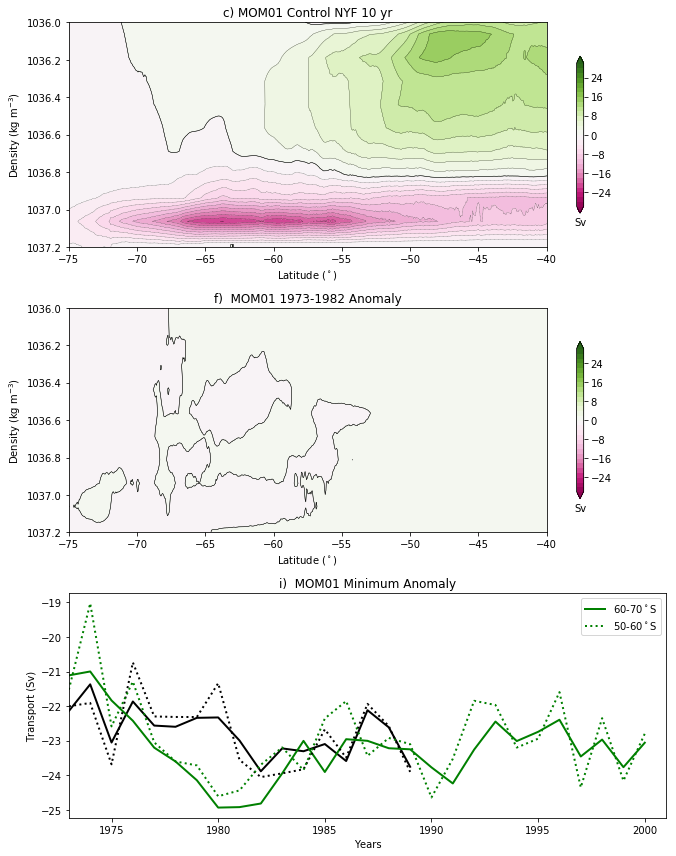

In [14]:
#plot GM Net in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('')


yrs=np.arange(1973,2017,1)

t1=0
t2=9
clev = np.arange(-30,32,2)

plt.subplot(311)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='c) MOM01 Control NYF 10 yr'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')


#clev = np.arange(-30,32,2)
#var=np.mean(pert_gmoc[t1:t2+1,:,:],axis=0)+np.mean(pert_gmoc_gm[t1:t2+1,:,:],axis=0)

#plt.subplot(312)
#plt.contourf(yu_ocean,potrho,var,cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Sv')
#plt.contour(yu_ocean,potrho,var,levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,var,levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.2,1036))
#plt.ylabel('Density (kg m$^{-3}$)')
#plt.xlabel('Latitude ($^\circ$)')
#plt.xlim([-75,-20])
#tit='b)  MOM025_NP 1973-1982'
#plt.title(tit)
##plt.plot([-75,-20], [1036.86,1036.86], 'k')

var_ann=np.mean(pert_gmoc_ann[t1:t2+1,:,:],axis=0)-np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0)

plt.subplot(312)
plt.contourf(yu_ocean,potrho,var_ann,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,var_ann,levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,var_ann,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='f)  MOM01 1973-1982 Anomaly'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')


#ax3 = plt.axes([0.99,0.38,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('Sv')

#plot time series of transports (with GM ... only 9 yrs for CNTRL) so using cntrl mean
T=np.arange(50)
#print T.shape

z1=np.argwhere(potrho<=1036.8125)
#print potrho[z1]
z1=np.asscalar(z1[-1])
#print potrho[z1]

ts=pert_gmoc_ann.shape
ts=ts[0]
#print ts

# do lower cell average between lats 60-70S
j1=np.argwhere(yu_ocean<-69.9)
j2=np.argwhere(yu_ocean<-60)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
#print yt_ocean[j1:j2]

lc_cntrl60_psj = cntrl_gmoc_ann[:,z1:,j1:j2]
lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)

lc_pert60_psj = pert_gmoc_ann[:,z1:,j1:j2]
lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)

# do lower cell average between lats 60-70S
j1=np.argwhere(yu_ocean<-59.9)
j2=np.argwhere(yu_ocean<-50)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
#print yt_ocean[j1:j2]

lc_cntrl50_psj = cntrl_gmoc_ann[:,z1:,j1:j2]
lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)

lc_pert50_psj = pert_gmoc_ann[:,z1:,j1:j2]
lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)


plt.subplot(313)
tit='Rho > ' +str(potrho[z1]) + ' 60-70$^\circ$S'
plt.plot(yrs[0:28],lc_cntrl60_psj_ts[0:28],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:28],lc_pert60_psj_ts[0:28],linestyle='-',color='g',label='60-70$^\circ$S',linewidth=2)
tit='Rho > ' +str(potrho[z1]) + ' 50-60$^\circ$S'
plt.plot(yrs[0:28],lc_cntrl50_psj_ts[0:28],linestyle=':',color='k',linewidth=2)
plt.plot(yrs[0:28],lc_pert50_psj_ts[0:28],linestyle=':',color='g',label='50-60$^\circ$S',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
plt.xlim([1973,1973+28])
tit='i)  MOM01 Minimum Anomaly'
plt.title(tit)
plt.legend(fontsize=10)

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig6c_gmoc.png'
plt.savefig(of,dpi=220)

In [15]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
np_cntrl_gmoc=np.load(of)
#print np_cntrl_gmoc.shape

of=os.path.join(NYFCntrlDir,'gmoc_gm_rho.npy')
np_cntrl_gmoc_gm=np.load(of)
#print np_cntrl_gmoc_gm.shape

#load gmoc in rho space
of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
np_pert_gmoc=np.load(of)
#print np_pert_gmoc.shape

of=os.path.join(NYFPertDir,'gmoc_gm_rho.npy')
np_pert_gmoc_gm=np.load(of)
#print np_pert_gmoc_gm.shape

In [16]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
nonp_cntrl_gmoc=np.load(of)
#print nonp_cntrl_gmoc.shape

#load gmoc in rho space
of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
nonp_pert_gmoc=np.load(of)
#print nonp_pert_gmoc.shape

vgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho.shape
#print yt_ocean.shape

In [18]:
#load gmoc in rho space
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr'#/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp/'#/g/data/hh5/tmp/cosima/mom01v5/kds75_cp/'

#Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
#print Ocean_File
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print pert.ty_trans_rho.shape

vgrid_file='/g/data/hh5/tmp/pas561/kds75_cp/output430/ocean.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yu_ocean2 = nc.variables['yu_ocean'][:]
nc.close() # close the file
#fix this to a 12 month average
nc = Dataset('/g/data/hh5/tmp/pas561/kds75_cp/output430/ocean.nc', mode='r') # file handle, open in read only mode
potrho2 = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho2.shape
#print yu_ocean2.shape

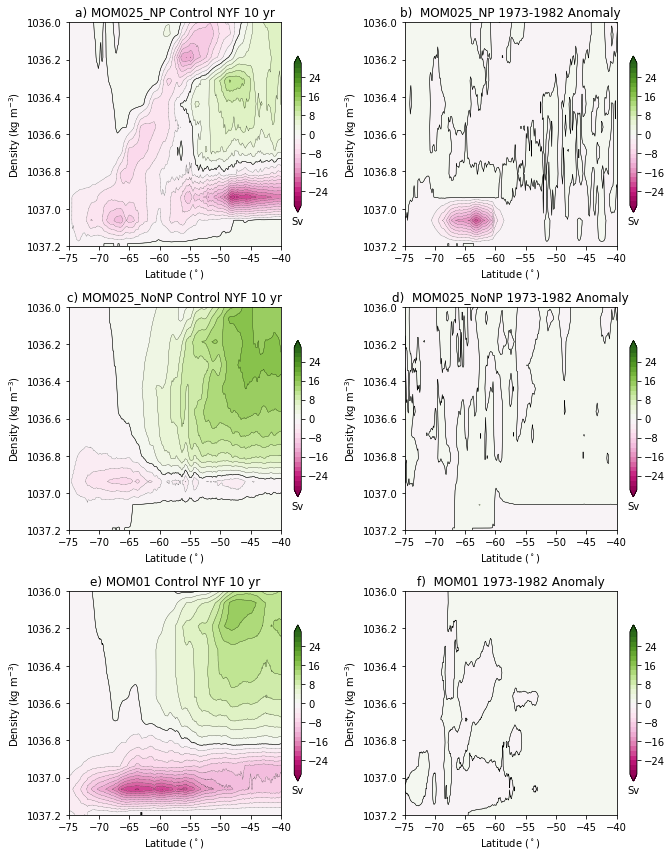

In [19]:
#plot GM Net in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('')

wp_os=3 #1971-1974

yrs=np.arange(1973,2017,1)

t1=0
t2=10
clev = np.arange(-30,32,2)

plt.subplot(321)
plt.contourf(yu_ocean,potrho,np.mean(np_cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(np_cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(np_cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='a) MOM025_NP Control NYF 10 yr'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')

plt.subplot(323)
plt.contourf(yu_ocean,potrho,np.mean(nonp_cntrl_gmoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(nonp_cntrl_gmoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(nonp_cntrl_gmoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='c) MOM025_NoNP Control NYF 10 yr'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')

plt.subplot(325)
plt.contourf(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='e) MOM01 Control NYF 10 yr'
plt.title(tit)


var=np.mean(np_pert_gmoc[t1:t2,:,:],axis=0)+np.mean(np_pert_gmoc_gm[t1:t2,:,:],axis=0)-np.mean(np_cntrl_gmoc[t1+wp_os:t2+wp_os,:,:],axis=0)-np.mean(np_cntrl_gmoc_gm[t1+wp_os:t2+wp_os,:,:],axis=0)

plt.subplot(322)
plt.contourf(yu_ocean,potrho,var,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,var,levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,var,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='b)  MOM025_NP 1973-1982 Anomaly'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')

var=np.mean(nonp_pert_gmoc[t1:t2+1,:,:],axis=0)-np.mean(nonp_cntrl_gmoc[t1+wp_os:t2+wp_os,:,:],axis=0)

plt.subplot(324)
plt.contourf(yu_ocean,potrho,var,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,var,levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,var,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='d)  MOM025_NoNP 1973-1982 Anomaly'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')
#ax3 = plt.axes([0.99,0.38,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('Sv')

var_ann=np.mean(pert_gmoc_ann[t1:t2+1,:,:],axis=0)-np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0)

plt.subplot(326)
plt.contourf(yu_ocean2,potrho2,var_ann,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean2,potrho2,var_ann,levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean2,potrho2,var_ann,levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,-40])
tit='f)  MOM01 1973-1982 Anomaly'
plt.title(tit)
#plt.plot([-75,-20], [1036.86,1036.86], 'k')

plt.tight_layout()

#of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig6_gmoc.png'
#plt.savefig(of,dpi=220)

(50,)
(49, 80, 1080)
1036.8125
(105, 195, -69.98914896732052)
[-60.08436456 -59.95944891 -59.83405816 -59.70819586 -59.5818561
 -59.45504242 -59.32774896 -59.19997921 -59.07172737 -58.94299691
 -58.81378207 -58.68408629 -58.55390386 -58.4232382  -58.29208365
 -58.16044361 -58.02831244 -57.89569353 -57.76258131 -57.62897914
 -57.49488147 -57.36029166 -57.22520422 -57.08962246 -56.95354096
 -56.81696301 -56.67988323 -56.54230489 -56.40422266 -56.26563981
 -56.12655104 -55.9869596  -55.84686025 -55.70625623 -55.56514233
 -55.42352179 -55.28138944 -55.13874852 -54.9955939  -54.8519288
 -54.70774816 -54.56305518 -54.41784483 -54.27212033 -54.12587669
 -53.9791171  -53.83183665 -53.68403851 -53.53571781 -53.38687773
 -53.23751345 -53.08762813 -52.937217   -52.78628324 -52.63482211
 -52.48283678 -52.33032258 -52.17728267 -52.02371243 -51.86961502
 -51.71498588 -51.55982815 -51.40413733 -51.24791657 -51.09116141
 -50.93387502 -50.77605297 -50.61769845 -50.45880708 -50.29938204]
1036.8125
(264,

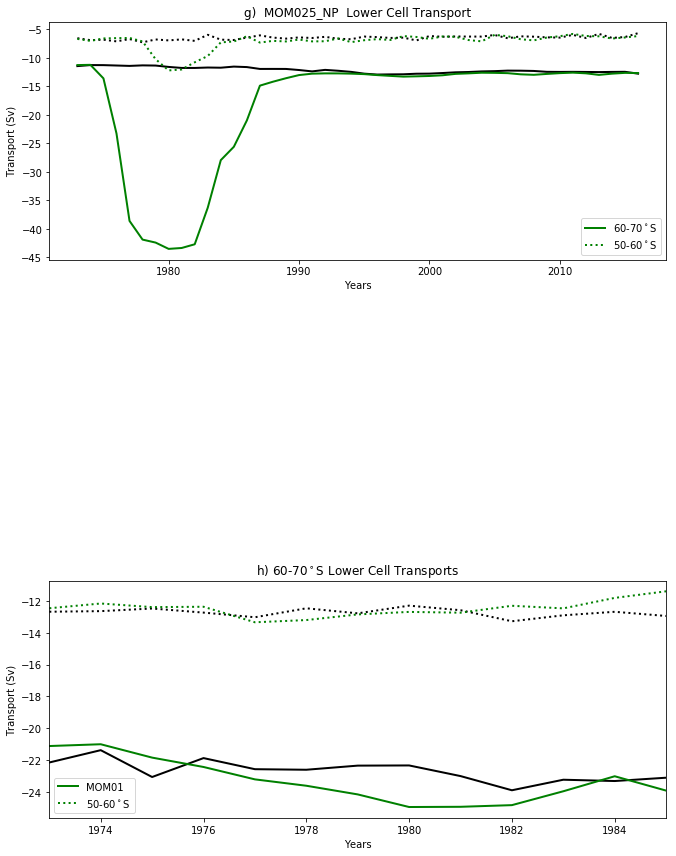

In [20]:
#plot time series of transports (with GM ... only 9 yrs for CNTRL) so using cntrl mean
T=np.arange(50)
print(T.shape)

#add 10 year mean GM to adv cntrl 
np_cntrl_gmoc_net=np_cntrl_gmoc[:,:,:]+np.mean(np_cntrl_gmoc_gm[:,:,:],axis=0)
print(np_cntrl_gmoc_net.shape)

z1=np.argwhere(potrho<=1036.8125)
#print potrho[z1]
z1=np.asscalar(z1[-1])
print(potrho[z1])

ts=np_pert_gmoc.shape
ts=ts[0]
#print ts

yrs=np.arange(1973,2017,1)

# do lower cell average between lats 60-70S
j1=np.argwhere(yt_ocean<-69.9)
j2=np.argwhere(yt_ocean<-60)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
print(j1,j2,yt_ocean[j1])

lc_cntrl60_psj = np_cntrl_gmoc_net[:,z1:,j1:j2]
np_lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)

lc_pert60_psj = np_pert_gmoc[:,z1:,j1:j2]+np_pert_gmoc_gm[:,z1:,j1:j2]
np_lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)

lc_cntrl60_psj = nonp_cntrl_gmoc[:,z1:,j1:j2]
nonp_lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)

lc_pert60_psj = nonp_pert_gmoc[:,z1:,j1:j2]
nonp_lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)


# do lower cell average between lats 60-70S
j1=np.argwhere(mom025_yu_ocean<-59.9)
j2=np.argwhere(yt_ocean<-50)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
print(yt_ocean[j1:j2])

lc_cntrl50_psj = np_cntrl_gmoc[:,z1:,j1:j2]
np_lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)

lc_pert50_psj = np_pert_gmoc[:,z1:,j1:j2]
np_lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)

lc_cntrl50_psj = nonp_cntrl_gmoc[:,z1:,j1:j2]
nonp_lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)

lc_pert50_psj = nonp_pert_gmoc[:,z1:,j1:j2]
nonp_lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)


plt.subplot(311)
tit='Rho > ' +str(potrho[z1]) + ' 60-70$^\circ$S'
plt.plot(yrs[0:44],np_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:44],np_lc_pert60_psj_ts[0:44],linestyle='-',color='g',label='60-70$^\circ$S',linewidth=2)
tit='Rho > ' +str(potrho[z1]) + ' 50-60$^\circ$S'
plt.plot(yrs[0:44],np_lc_cntrl50_psj_ts[0+wp_os:44+wp_os],linestyle=':',color='k',linewidth=2)
plt.plot(yrs[0:44],np_lc_pert50_psj_ts[0:44],linestyle=':',color='g',label='50-60$^\circ$S',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='g)  MOM025_NP  Lower Cell Transport'
plt.title(tit)
plt.legend(fontsize=10)

#plt.subplot(312)
#tit='Rho > ' +str(potrho[z1]) + ' 60-70$^\circ$S'
#plt.plot(yrs[0:44],nonp_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='-',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_pert60_psj_ts[0:34],linestyle='-',color='g',label='60-70$^\circ$S',linewidth=2)
#tit='Rho > ' +str(potrho[z1]) + ' 50-60$^\circ$S'
#plt.plot(yrs[0:44],nonp_lc_cntrl50_psj_ts[0+wp_os:44+wp_os],linestyle=':',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_pert50_psj_ts[0:44],linestyle=':',color='g',label='50-60$^\circ$S',linewidth=2)
#plt.xlim((1037.5,1035))
#plt.ylabel('Transport (Sv)')
#plt.xlabel('Years')
#plt.xlim([-75,85])
#tit='h)  MOM025_NoNP Lower Cell Transport'
#plt.title(tit)
#plt.legend(fontsize=10)


z1=np.argwhere(potrho2<=1036.8125)
#print potrho[z1]
z1=np.asscalar(z1[-1])
print(potrho2[z1])

ts=pert_gmoc_ann.shape
ts=ts[0]
#print ts

# do lower cell average between lats 60-70S
j1=np.argwhere(yu_ocean2<-69.9)
j2=np.argwhere(yu_ocean2<-60)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
print(j1,j2,yu_ocean2[j1])


lc_cntrl60_psj = cntrl_gmoc_ann[:,z1:,j1:j2]
lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)

lc_pert60_psj = pert_gmoc_ann[:,z1:,j1:j2]
lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)

# do lower cell average between lats 60-70S
j1=np.argwhere(yu_ocean<-59.9)
j2=np.argwhere(yu_ocean<-50)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
print(j1,j2,yu_ocean2[j1])

lc_cntrl50_psj = cntrl_gmoc_ann[:,z1:,j1:j2]
lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)

lc_pert50_psj = pert_gmoc_ann[:,z1:,j1:j2]
lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)


plt.subplot(313)
plt.plot(yrs[0:28],lc_cntrl60_psj_ts[0:28],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:28],lc_pert60_psj_ts[0:28],linestyle='-',color='g',label='MOM01',linewidth=2)
plt.plot(yrs[0:28],lc_cntrl50_psj_ts[0:28],linestyle=':',color='k',linewidth=2)
plt.plot(yrs[0:28],lc_pert50_psj_ts[0:28],linestyle=':',color='g',label='50-60$^\circ$S',linewidth=2)
plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
plt.xlim([1973,1973+12])
tit='h) 60-70$^\circ$S Lower Cell Transports'
plt.title(tit)
plt.legend(fontsize=10)

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig6_gmoc_ts.png'
plt.savefig(of,dpi=220)



/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


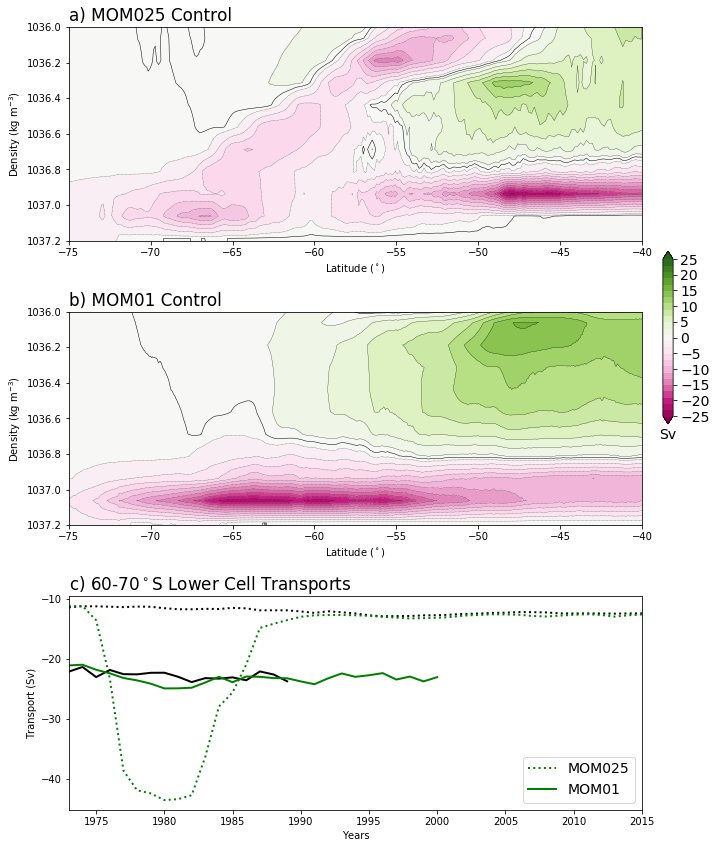

<Figure size 648x1008 with 0 Axes>

In [21]:
#plot GM Net in rho space
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

fontsize=14

fig, axs = plt.subplots(3, 1)

plt.rcParams['font.size'] = fontsize

plt.figure(figsize(9,14))
wp_os=3 #1971-1974

yrs=np.arange(1973,2017,1)

t1=0
t2=10
clev = np.arange(-25,27,2)
tick_lvls = np.arange(-25,30,5)

ax = axs[0] #plt.subplot(311)
pcm=ax.contourf(yu_ocean,potrho,np.mean(np_cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Sv')
ax.contour(yu_ocean,potrho,np.mean(np_cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
ax.contour(yu_ocean,potrho,np.mean(np_cntrl_gmoc[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
ax.invert_yaxis()
ax.yaxis.set_major_formatter(x_formatter)
ax.axis(ymin=1037.2,ymax=1036, xmin=-75,xmax=-40) #ax.ylim((1037.2,1036))
#ax.ylim((1037.2,1036))
ax.set_ylabel('Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$)')
#ax.xlim([-75,-40])
tit='a) MOM025 Control'
ax.set_title(tit,loc='left')
#plt.plot([-75,-20], [1036.86,1036.86], 'k')
#cb.remove()

ax = axs[1] #plt.subplot(312)
pcm=ax.contourf(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Sv')
ax.contour(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
ax.contour(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
ax.invert_yaxis()
ax.yaxis.set_major_formatter(x_formatter)
ax.axis(ymin=1037.2,ymax=1036, xmin=-75,xmax=-40) #ax.ylim((1037.2,1036))
ax.set_ylabel('Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$)')
#ax.xlim([-75,-40])
tit='b) MOM01 Control'
ax.set_title(tit,loc='left')

# colorbar:
cbaxes = fig.add_axes([0.99,0.5,0.015,0.2]) 
cb=fig.colorbar(pcm, ax=axs[0:2],cax=cbaxes,ticks=tick_lvls, shrink=0.6)
#ax = plt.gca()
#divider = make_axes_locatable(ax)
#ax3 = plt.axes([0.97,0.5,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_xlabel('Sv')

ax = axs[2] #plt.subplot(313)
ax.plot(yrs[0:44],np_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle=':',color='k',linewidth=2)
ax.plot(yrs[0:44],np_lc_pert60_psj_ts[0:44],linestyle=':',color='g',label='MOM025',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='--',color='k',linewidth=2)
#plt.plot(yrs[0:44],nonp_lc_pert60_psj_ts[0:44],linestyle='--',color='g',label='MOM025_NoNP',linewidth=2)
ax.plot(yrs[0:28],lc_cntrl60_psj_ts[0:28],linestyle='-',color='k',linewidth=2)
ax.plot(yrs[0:28],lc_pert60_psj_ts[0:28],linestyle='-',color='g',label='MOM01',linewidth=2)
#plt.xlim((1037.5,1035))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Years')
#plt.xlim([1973,1973+12])
tit='c) 60-70$^\circ$S Lower Cell Transports'
ax.set_title(tit,loc='left')
ax.legend(fontsize=fontsize)
ax.axis(xmin=1973,xmax=2015) 

fig.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig6_gmoc.png'
fig.savefig(of,dpi=220,bbox_inches='tight')

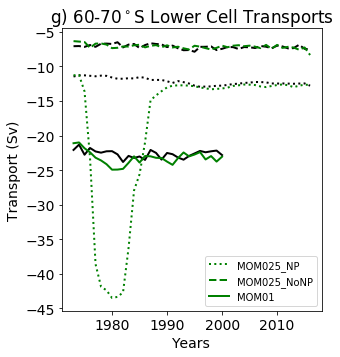

In [20]:
plt.subplot(321)
plt.plot(yrs[0:44],np_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle=':',color='k',linewidth=2)
plt.plot(yrs[0:44],np_lc_pert60_psj_ts[0:44],linestyle=':',color='g',label='MOM025_NP',linewidth=2)
plt.plot(yrs[0:44],nonp_lc_cntrl60_psj_ts[0+wp_os:44+wp_os],linestyle='--',color='k',linewidth=2)
plt.plot(yrs[0:44],nonp_lc_pert60_psj_ts[0:44],linestyle='--',color='g',label='MOM025_NoNP',linewidth=2)
plt.plot(yrs[0:28],lc_cntrl60_psj_ts[0:28],linestyle='-',color='k',linewidth=2)
plt.plot(yrs[0:28],lc_pert60_psj_ts[0:28],linestyle='-',color='g',label='MOM01',linewidth=2)
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='g) 60-70$^\circ$S Lower Cell Transports'
plt.title(tit)
plt.legend(fontsize=10)

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig6_gmoc_ts.png'
plt.savefig(of,dpi=220)


In [11]:
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp3/'
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
cntrl_gmoc=np.load(of)

print(cntrl_gmoc.shape) 

(115, 80, 2700)


In [12]:
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
pert_gmoc=np.load(of)

print(pert_gmoc.shape) 

(116, 80, 2700)
